<h1><center>Mobile Price Range Classification



# Problem Statement



In the comoetitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of mobile phone(eg- RAM,Internal Memory,etc)and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# Data Exploration


Some distribution tables are created in excel and snapshots are attached here.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [ ]:
# loading the Dataset
path = '/content/drive/MyDrive/col/mobile classification/train.csv'

df = pd.read_csv(path)

df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
columns = df.columns

columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## Handling discrepancy in data

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


From the above description, I can see the minnimum value for columns 'sc_w' (screen width) and for 'px_height' is 0, which is not possible in real life. We need handle these discrepencies in data and will have to replace these values.

In [ ]:
# check in how many rows sc_w is 0
df[df['sc_w']==0].shape[0]

180

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


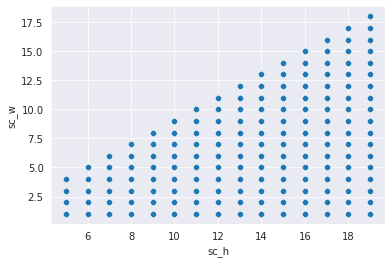

In [ ]:
# relation between sc_h and sc_w

sns.scatterplot(df[df['sc_w']!=0]['sc_h'], df[df['sc_w']!=0]['sc_w'])
plt.show()

As we can see in the above plot, for each value of 'sc_h' there are multiple values of 'sc_w', so our best shot for guessing the values of the 'sc_w' would be taking an aggegate of all available values 'sc_w' for all values of 'sc_h'.

In [ ]:
srs = df[df['sc_w']!=0].groupby(by='sc_h')['sc_w'].mean()
d = {key:math.ceil(value) for key,value in zip(srs.index, srs.values)}

In [ ]:
srs = df[df['sc_w']!=0].groupby(by='sc_h')['sc_w'].mean()

srs

sc_h
5     2.426667
6     2.768421
7     3.603053
8     4.247619
9     4.043860
10    4.592593
11    5.871795
12    6.608392
13    6.636364
14    7.154412
15    7.348837
16    8.128788
17    8.807692
18    8.938053
19    9.848739
Name: sc_w, dtype: float64

In [ ]:
d = {key:math.ceil(value) for key,value in zip(srs.index, srs.values)}

In [ ]:
sc_h = list(df['sc_h'])
sc_w = list(df['sc_w'])

for i in range(len(sc_w)):
    if sc_w[i] == 0:
        sc_w[i] = d[sc_h[i]]

df['sc_h'] = sc_h
df['sc_w'] = sc_w

In [ ]:
df[df['sc_w']==0].shape[0]

0

Converting columns 'sc_h' and 'sc_w' in a single column screen_size , it will be the vertical length of the mobile.

In [ ]:
df['screen_size'] = ((df['sc_h']**2)+(df['sc_w']**2))**0.5

df.drop(['sc_h','sc_w'], axis=1 ,inplace=True)

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'talk_time', 'three_g', 'touch_screen', 'wifi',
       'price_range', 'screen_size'],
      dtype='object')

Now let's deal with the zeros in 'px_height' column.

In [ ]:
# there are only two observations where 'px_height' in 0
df[df['px_height']==0]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range,screen_size
1481,1834,0,2.1,0,7,1,40,0.1,99,4,11,0,1987,3692,16,1,1,0,3,14.764823
1933,897,1,2.0,0,3,1,2,0.6,154,8,10,0,994,1958,7,1,1,0,1,8.602325


Only two rows are showing discrepancy in 'px_heigh', but we'll be using the similar method for this too.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


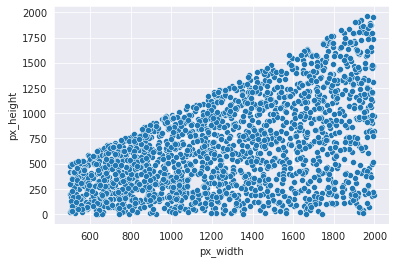

In [ ]:
sns.scatterplot(df[df['px_height']!=0]['px_width'], df[df['px_height']!=0]['px_height'])
plt.show()

Let's try linear regression to get this done.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

model.fit(df[df['px_height']!=0].loc[:,['px_width']], df[df['px_height']!=0]['px_height'])

LinearRegression()

In [ ]:
model.predict(df[df['px_height']==0].loc[:,['px_width']])

array([1032.76691389,  510.41857086])

In [ ]:
df[df['px_height']==0].index

Int64Index([1481, 1933], dtype='int64')

In [ ]:
# fixing the values
for i, value in zip(df[df['px_height']==0].index, model.predict(df[df['px_height']==0].loc[:,['px_width']])):
    df.at[i,'px_height'] = int(value)

In [ ]:
df[df['px_height']==0].shape
# zero rows we have now

(0, 20)

In [ ]:
# categorical and continuous separation

categoricals = [ 'blue',  'dual_sim',  'four_g',
         'three_g', 'touch_screen', 'wifi', 'n_cores']

continuous = ['battery_power','clock_speed','fc','int_memory','m_dep', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'talk_time','screen_size']

Let's analyze the features value distribution for each target class.

## Categorical analysis

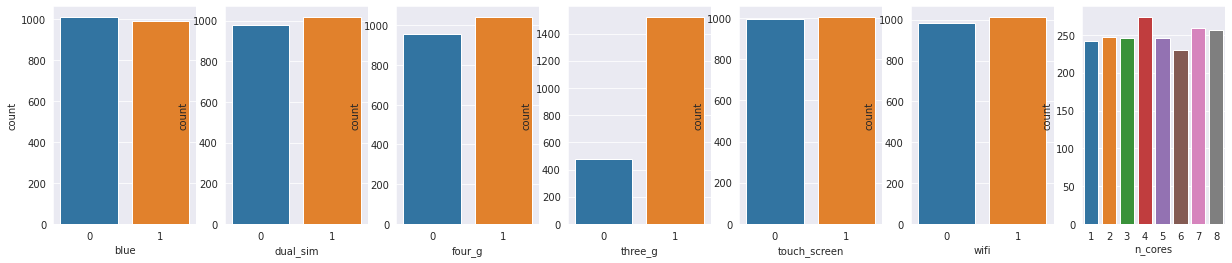

In [ ]:
fig, axs = plt.subplots(1, len(categoricals), figsize=(21,4))

for i in range(len(categoricals)):
    sns.countplot(x=df[categoricals[i]], ax=axs[i])


As we can see in the plot above, except 'three_g' and 'n_cores' feature, almost all of them have equal distribution of both categories, three_g can play an important role in prediction.

In [ ]:
# function to plot the distribution of categorical feature
# for each price range category
def plot_along_taget(column_name):
    fig, axs = plt.subplots(1,4, figsize=(16, 4))
    for i in range(4):
        sns.countplot(x=df[df['price_range']==i][column_name] , ax=axs[i])
        axs[i].set_xlabel(f'{column_name} category')
        axs[i].set_title(f'for price_range = {i}')

Now let us see the categorical variables distribution along the different categories of target variable 'price_range'

### Bluetooth

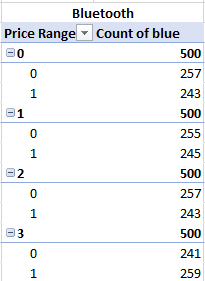

The availability of bluetooth is almost same for every price range as you can see in the above table,let's validate it with the graph.

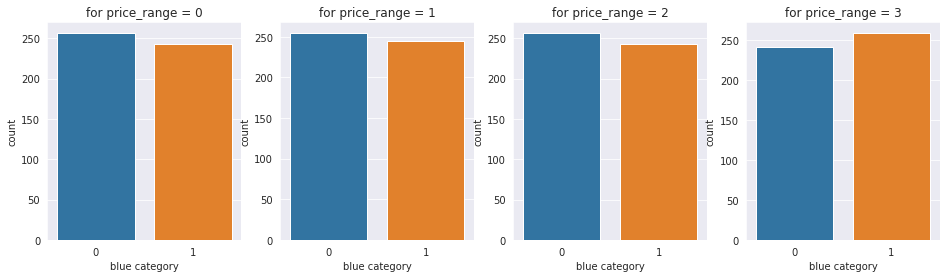

In [ ]:
plot_along_taget('blue')

The bluetooth distribution doesn't really varies much from one price_range to another. They all have almost half observations with bluetooth.

### Dual Sim

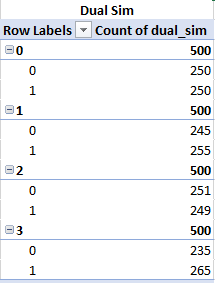

The dual_sim feature is present in half of the observations in each cateory as we can see above table. Let's validate it by graph.

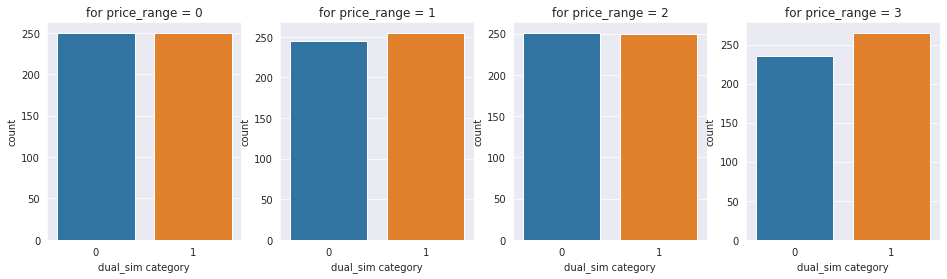

In [ ]:
plot_along_taget('dual_sim')

The dual_sim feature distributions shows a little pattern for only price_category 3. For rest of them it has half half distribution.

### 4G

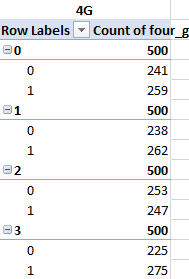

The availability of 4G sim feature also shows similar distribution for each class except price_range 3.

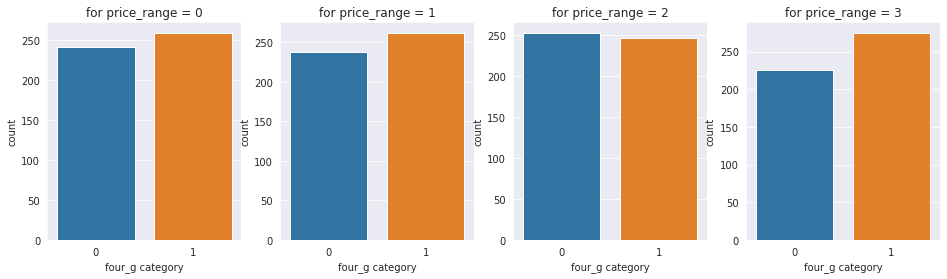

In [ ]:
plot_along_taget('four_g')

The graph also shows the same thing. For price range 3 we have more observations with 4G availability.

### 3G

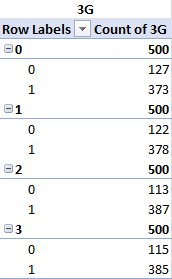

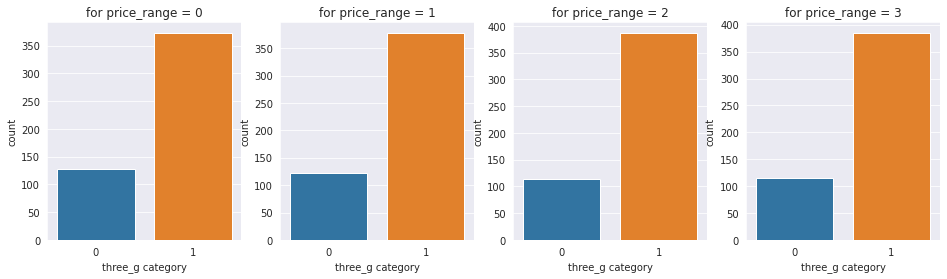

In [ ]:
plot_along_taget('three_g')

The availability of 3G shows quite similar distribution for each price range, which doesn't look good for predictions.

### 4G and 3G feature analysis

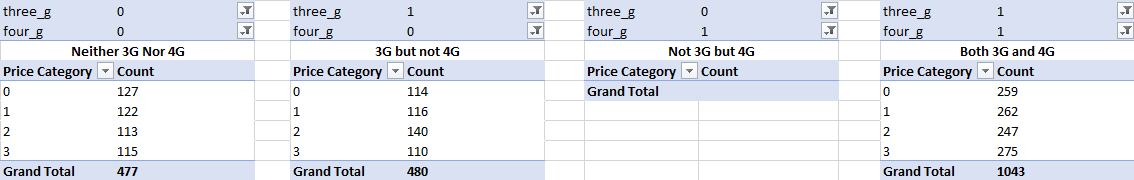

In the above tables, we can look at the combination of feature 3G and 4G. Interestingly, we can observe(look at the third table from left) that there are zero number of mobile phones that supports 4G but not 3G. That means every phone that supports 4G, will support 3G by default.

So, I'm gonna make a single feature called 'network' out of 3G and 4G features.

In [ ]:
df['network'] = df['four_g'] + df['three_g']

In this new feature 'network', there will be three categories:


*   0 : Supports neither of 3G or 4G
*   1 : Supports 3G but not 4G
*   2 : Supports both 3G and 4G



In [ ]:
# drop the 3G and 4G columns
df.drop(['four_g', 'three_g'], inplace=True, axis=1)

In [ ]:
categoricals.remove('four_g')
categoricals.remove('three_g')

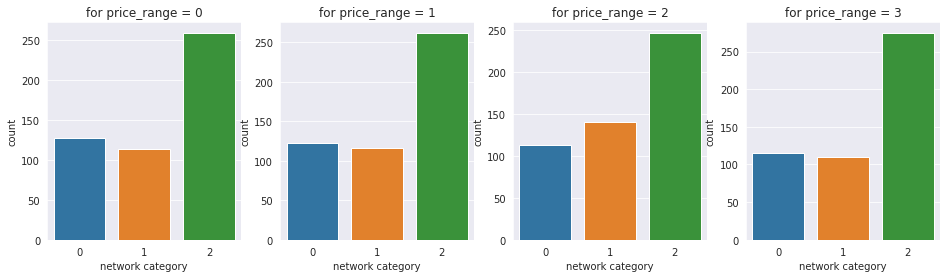

In [ ]:
# analyze the distribution of network along target variable
plot_along_taget('network')

The new feature 'network' also does not show much variation along the price ranges. But using it instead of 3G and 4G both will help to reduce the complexity of the problem and makes the models more interpretable.

### Touch Screen

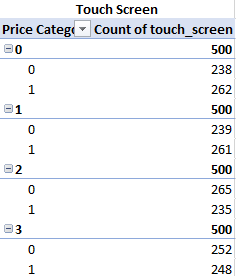

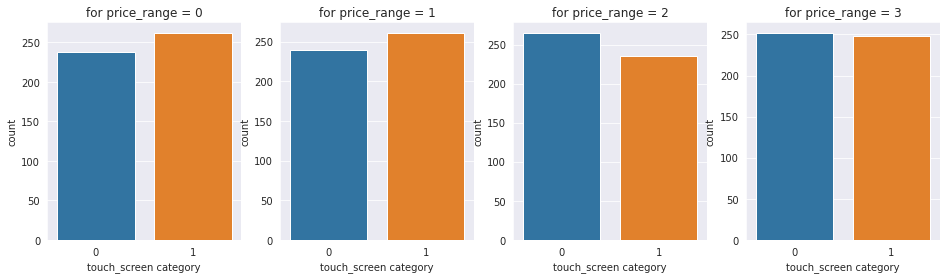

In [ ]:
plot_along_taget('touch_screen')

Touch screen feature shows very little variation along the different price categories, which won't help much in price range prediction.

### WiFi

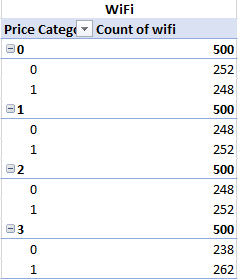

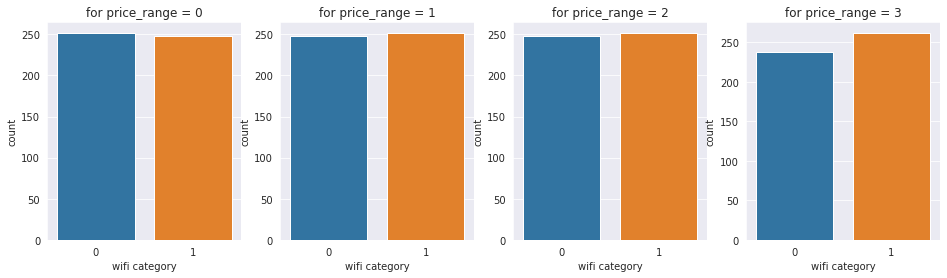

In [ ]:
plot_along_taget('wifi')

The wifi feature shows quite similar features except for the price_range 3.

### n_cores

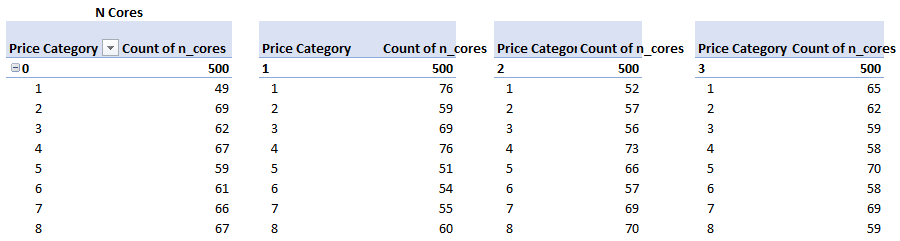

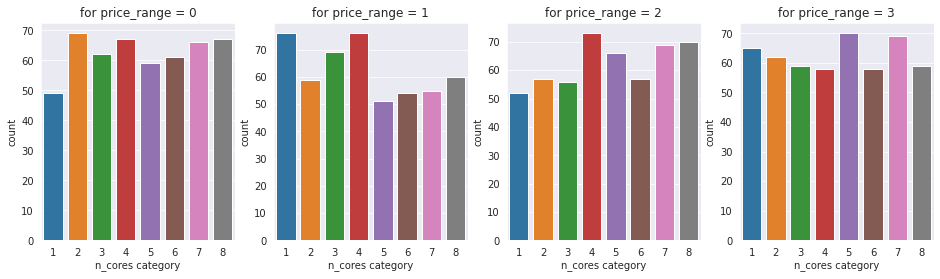

In [ ]:
plot_along_taget('n_cores')

number of cores in mobile shows some interesting patterns for different price ranges. It can be a helpful factor for price range prediction.

## Continuous variables analysis

In [ ]:
df[continuous].head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,talk_time,screen_size
0,842,2.2,1,7,0.6,188,2,20,756,2549,19,11.401754
1,1021,0.5,0,53,0.7,136,6,905,1988,2631,7,17.262677
2,563,0.5,2,41,0.9,145,6,1263,1716,2603,9,11.180340
3,615,2.5,0,10,0.8,131,9,1216,1786,2769,11,17.888544
4,1821,1.2,13,44,0.6,141,14,1208,1212,1411,15,8.246211


Let's convert screen_size from cm to inches, since in real life we use inches to tell a screen size.

In [ ]:
df['screen_size'] = df['screen_size']/2.54

Also converting RAM unit from Megabytes to Gigabytes, since we are more usual to Gigabytes.

In [ ]:
df['ram'] = df['ram']/1024

In [ ]:
sns.set_style('darkgrid')

### Battery Power

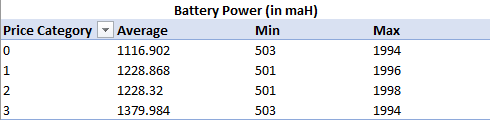

Here we're using density plot, which is a variation of histogram to viualize the distribution of a continuous variable along the categories of target variable.

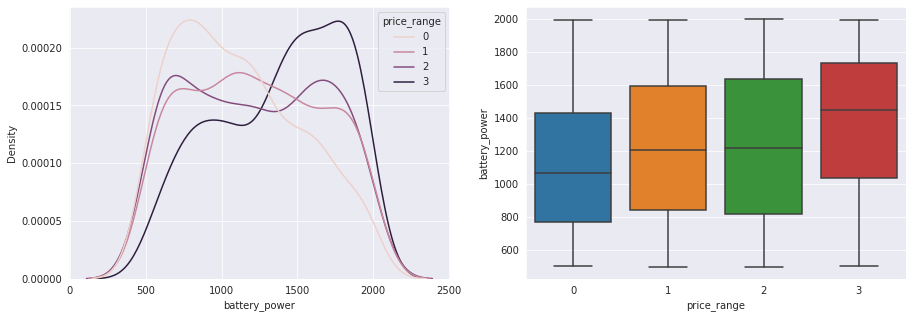

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='battery_power', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='battery_power', ax=axs[1])
plt.show()

Here we can notice clear distribution difference for price_range-0 and price_range-3.


*   Mobiles in price_range-0 mostly have lower battery power.
*   Mobiles in price_range-3 mostly have higher battery power.
*   Mobiles in price_range-1 and price_range-2 also showing some variation in distribtion.

Based on these observations, we can conclude that this feature would be importand for predicting price_range.



### Clock Speed

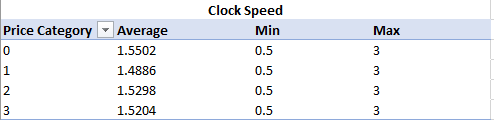

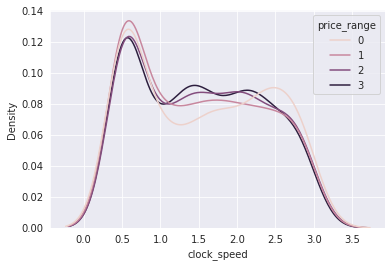

In [ ]:
sns.kdeplot(data=df, x='clock_speed', hue='price_range',)
plt.show()

The Clock Speed distribution is very similar along all the price ranges except 0 , which is a little different.

### FC (front camera megapixels)

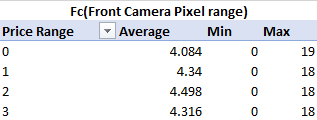

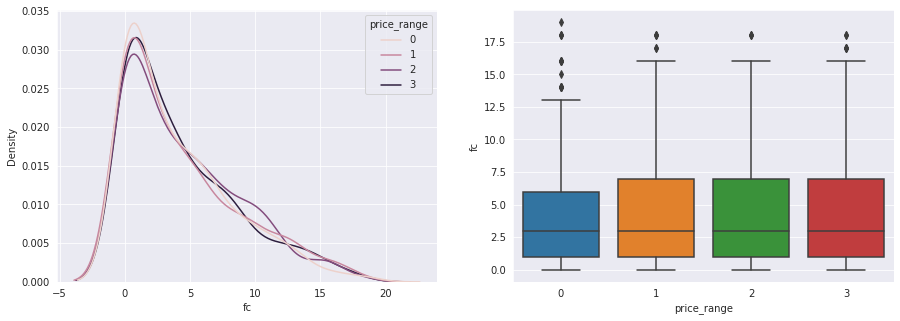

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='fc', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='fc', ax=axs[1])
plt.show()

This features distribution is almost similar along all the price ranges variable, it may not be helpful in making predictions.

### Internal Memory

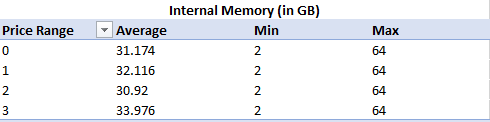

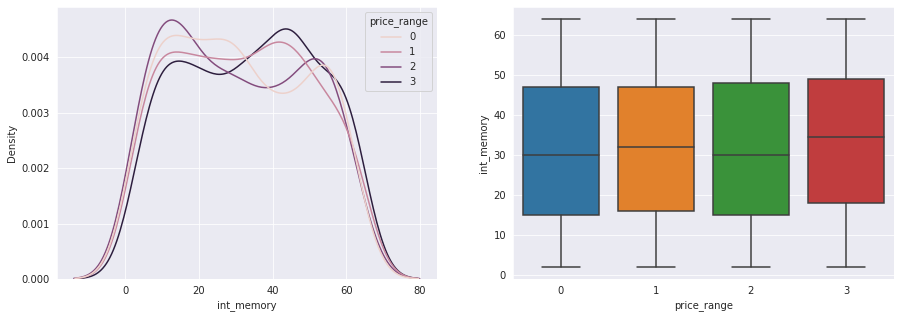

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='int_memory', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='int_memory', ax=axs[1])
plt.show()

There is a little variation in the Internal Memory along the Price range. Mobiles with higher price seems to have higher internal memory. This feature could be helpful in predicting the Price range.

### Mobile Depth

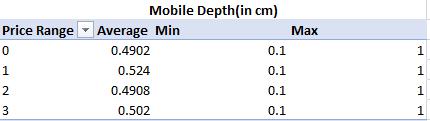

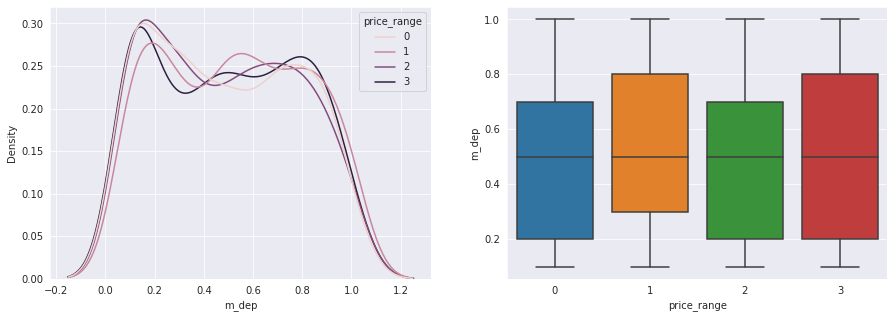

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='m_dep', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='m_dep', ax=axs[1])
plt.show()

Mobile depth again has somewhat similar kind of distribution along all the price_ranges. It's not gonna be a driving factor for deciding price.

### Mobile Weight

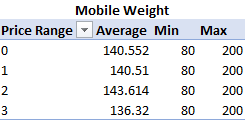

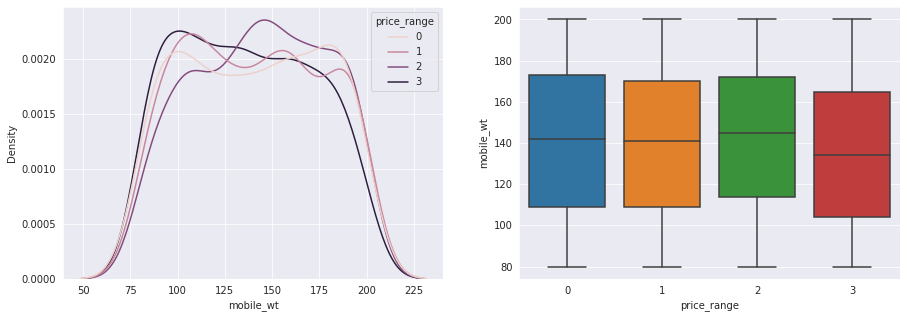

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='mobile_wt', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='mobile_wt', ax=axs[1])
plt.show()

Mobile weight is reduced a little bit in the Price category-3 which means costly phones are ligher. A little variation is observed here in all price_ranges.

### PC (Primary camera Megapixels)

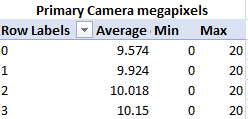

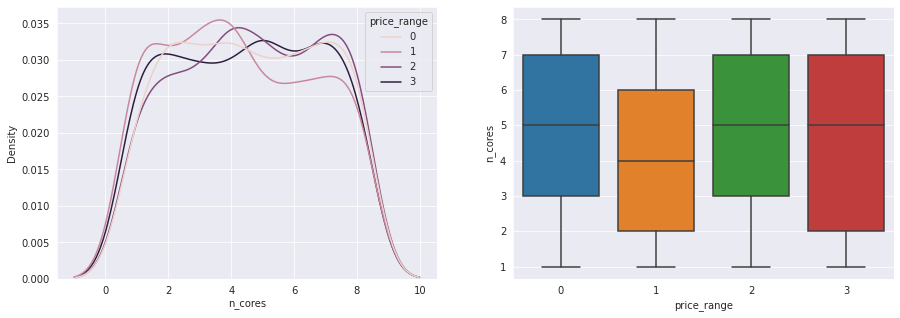

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='n_cores', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='n_cores', ax=axs[1])
plt.show()

Primary camera megapixels are showing a little variation along the target categories, which is a good sign for prediction.

### Screen Size (Vertical length in pixels)

This is a feature that was not given in the dataset and was generated manually with the help of two features screen_height and screen_width. Instead of Screen height and width, we can keep this feature in the dataset to handle multicollinearity.

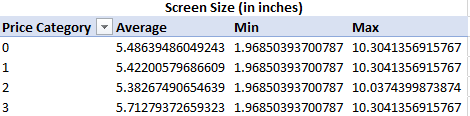

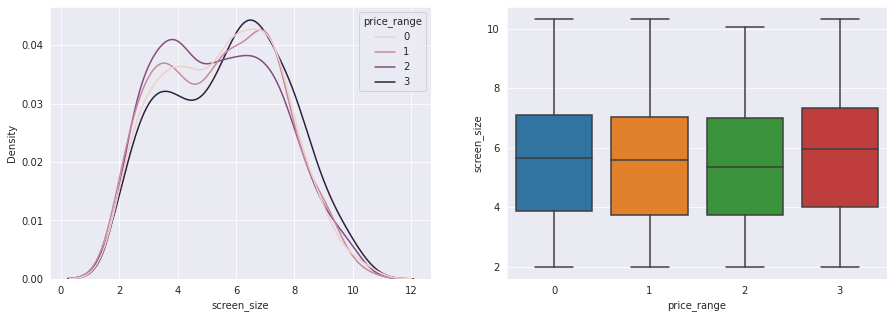

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='screen_size', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='screen_size', ax=axs[1])
plt.show()

Screen Size shows little variation along the target variables. This can be helpful in predicting the target categories.

### px_height (Pixel Resolution Height)

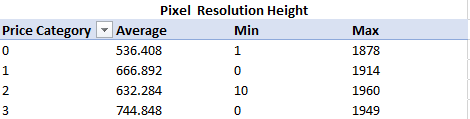

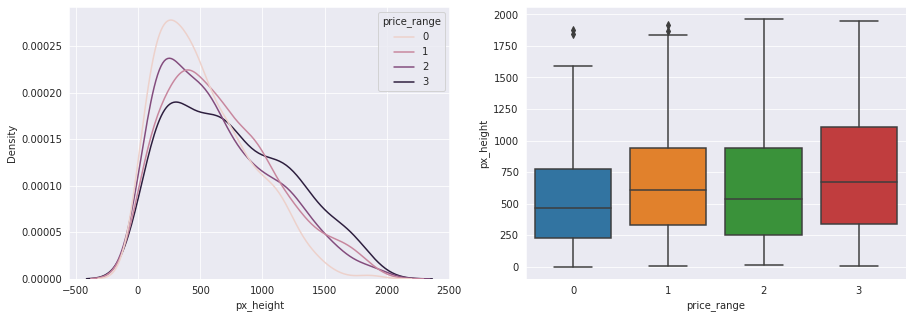

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_height', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_height', ax=axs[1])
plt.show()

A little variation is there in px_height.

### px_width (Pixel resolution width)

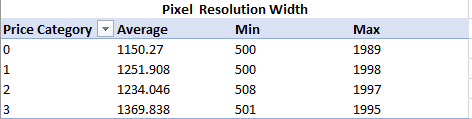

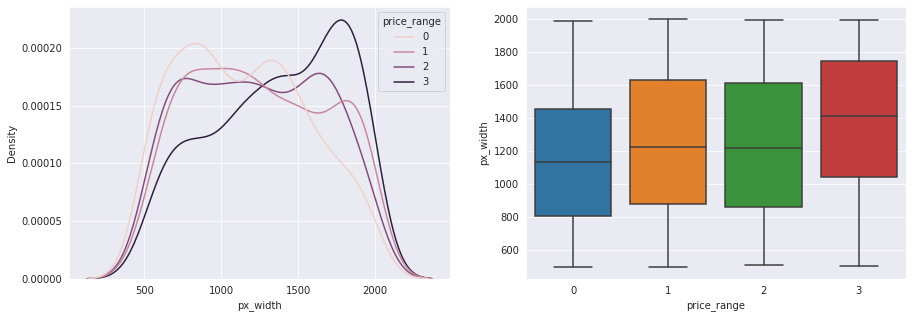

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='px_width', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='px_width', ax=axs[1])
plt.show()

Some variation is visible here in px_width as well, so we can say that it would be a driving factor in deciding price_range.

### RAM (in GB)

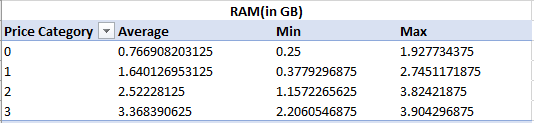

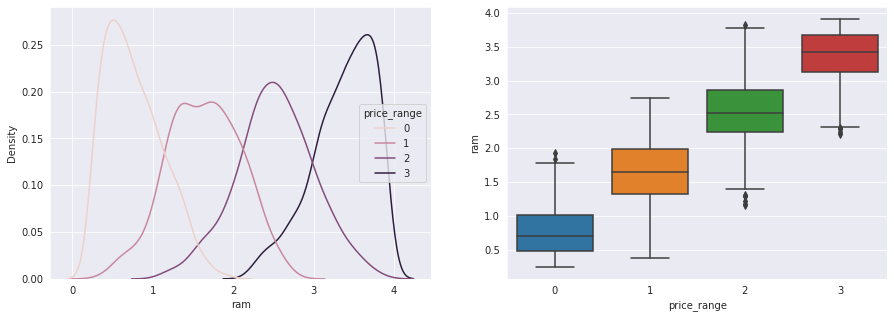

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='ram', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='ram', ax=axs[1])
plt.show()

RAM is showing a great variation in the distribution along the target variable. Which is a good sign for making predictions. RAM is gonna be a driving factor for predicting price_range.

### Talk Time (in Hours)

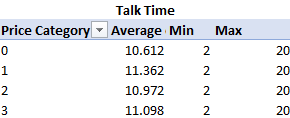

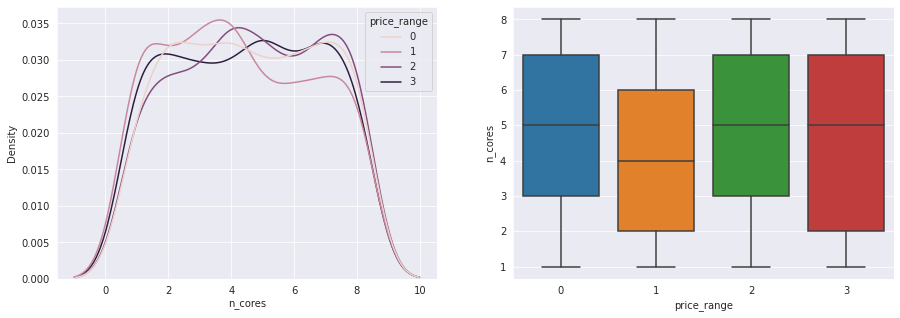

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='n_cores', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='n_cores', ax=axs[1])
plt.show()

A little variation is visible in talk time along the price_ranges.

### Checking colinearity in continuous variables

In [ ]:
corr = df[continuous].corr()

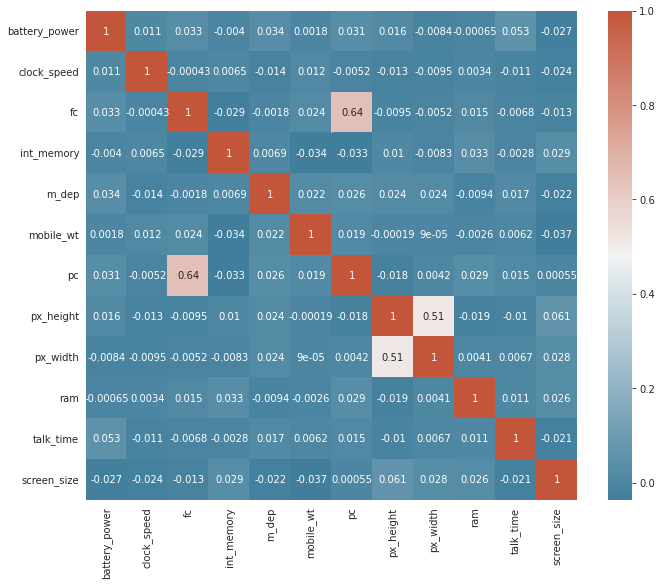

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)
plt.show()

There is some colinearity in feature pairs ('pc', 'fc') and ('px_width', 'px_height'). Both correlations are justified since there are good chances that if front camera of a phone is good, the back camera would also be good.

Also if px_height increases, pixel width also increases, that means the overall pixels in the screen. We can replace these two features with one feature.

In [ ]:
# make single feature out of px_height and px_width.
df['pixels'] = df['px_height']*df['px_width']

In [ ]:
continuous.append('pixels')

In [ ]:
continuous.remove('px_height')
continuous.remove('px_width')

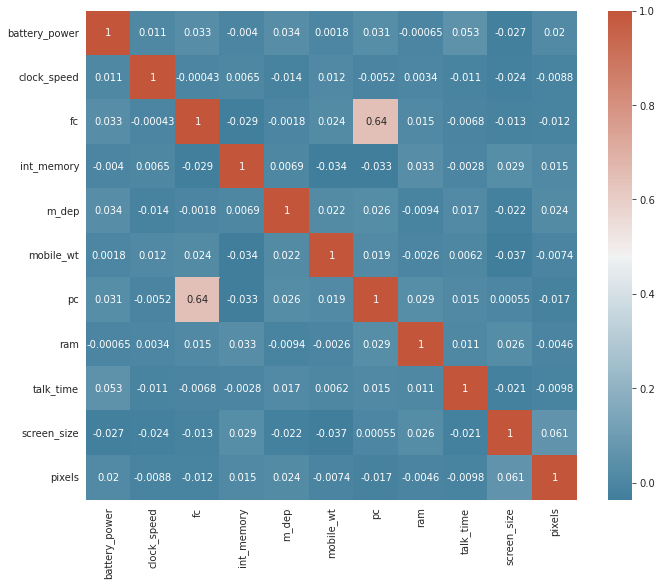

In [ ]:
# let's check the colinearity again
corr = df[continuous].corr()

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)
plt.show()

We can drop the px_height and px_width column now.

In [ ]:
df.drop(['px_height', 'px_width'], axis=1, inplace=True)

Front Camera megapixels and Primary camera megapixels are different entities despite of showing colinearity. So we'll be keeping them as they are.

# Predictive Modelling

Before moving forward with the predictive modelling, let's summarise all preprocessin in one function, so we can start right from this point the next time we open notebook.

In [ ]:
def preprocess():
    df = pd.read_csv('/content/drive/MyDrive/col/mobile classification/train.csv')

    # replace 180 zeros in 'sc_w' column

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# have a look at the features
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'int_memory',
       'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'touch_screen', 'wifi', 'price_range', 'screen_size', 'network',
       'pixels'],
      dtype='object')

In [ ]:
X = df.drop('price_range', axis=1)
y = df.price_range.values

Since the dataset is perfectly balanced for each class, I wrote a custom train_test_split function, that returns the perfectly balanced train_set and test_set.

In [ ]:
# since the dataset is perfectly balanced
# we want the test set and train set also to be
# balanced perfectly
def train_test_split(X, y, test_size=.10, random_state=42):
    # list of indexes of the observations
    # in the test set and train set
    train_indexes = []
    test_indexes = []
    
    np.random.seed(random_state)
    
    # for each category of target variable
    for i in np.unique(y):
        indices = np.where(y==i)[0]
        test = np.random.choice(indices, size=int(len(indices)*test_size), replace=False)
        train = list(set(indices) - set(test))
        #train = [ind for ind in indices if ind not in test]
        train_indexes.extend(train)
        test_indexes.extend(test)
    
    X_train = np.take(a=X, indices=train_indexes, axis=0)
    X_test = np.take(a=X, indices=test_indexes, axis=0)
    y_train = np.take(a=y, indices=train_indexes, axis=0)
    y_test = np.take(a=y, indices=test_indexes, axis=0)
    
    return(X_train, X_test, y_train, y_test)

Function for class based accuracy:

In [ ]:
##  plot for class_based_accuracy

In [ ]:
def class_based_acc(y_test, y_pred):
    for i in np.unique(y_test):
        indices = np.where(y_test==i)[0]
        test = np.take(y_test, indices=indices, axis=0)
        pred = np.take(y_pred, indices=indices, axis=0)
        acc = np.count_nonzero(pred == i)/len(test)
        print(f'Class {i}: {acc}')

## Decision Tree

In [ ]:
clsr = DecisionTreeClassifier()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# check frequency of each class in test set
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3]), array([100, 100, 100, 100]))

In [ ]:
clsr.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clsr.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.84

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       100
           1       0.84      0.81      0.82       100
           2       0.74      0.82      0.78       100
           3       0.87      0.83      0.85       100

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400



Have a look at the feature importances according to decision tree model

In [ ]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)

In [ ]:
feature_importance.head()

,Feature,Score
0,ram,0.617041
1,battery_power,0.159854
2,pixels,0.131461
3,talk_time,0.018202
4,mobile_wt,0.013360


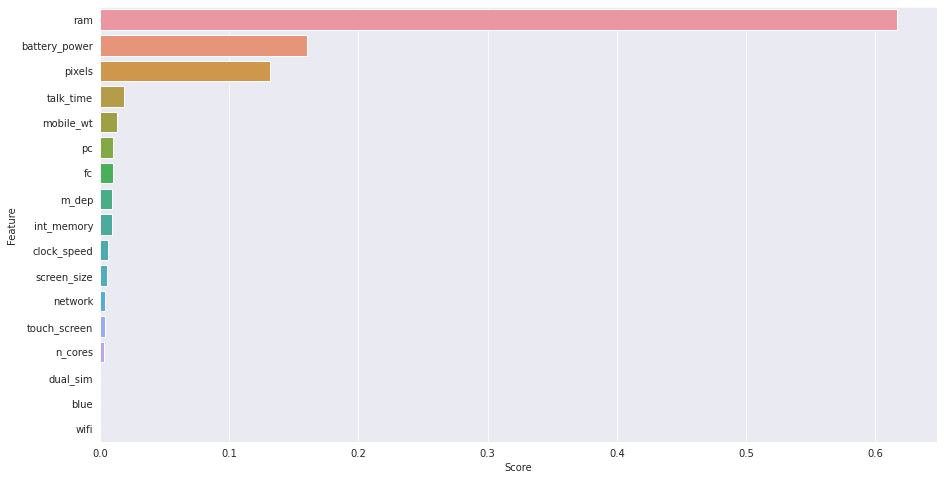

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

### Visualizing the tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

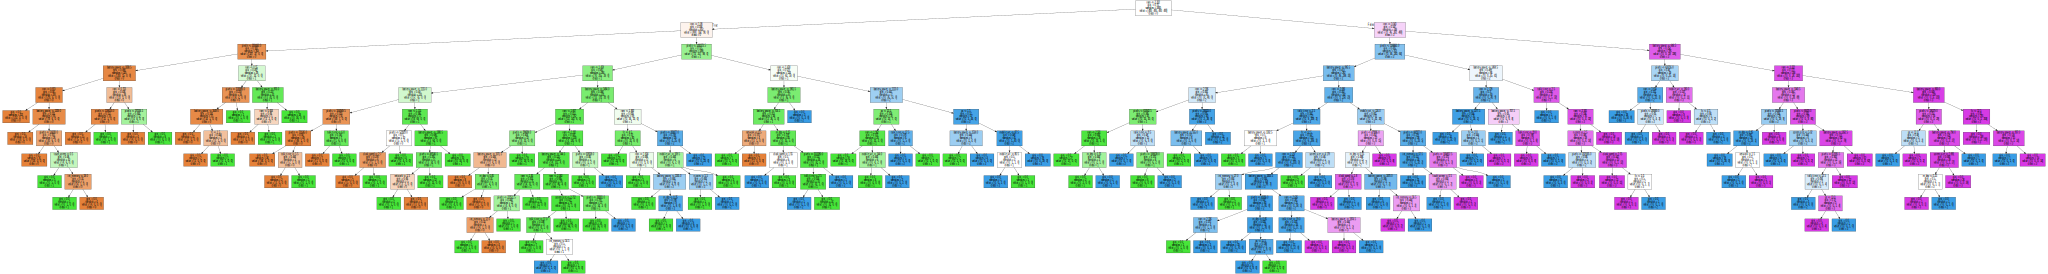

In [ ]:
graph = Source(tree.export_graphviz(clsr, out_file=None
   , feature_names=df.drop('price_range', axis=1).columns, class_names=['0', '1', '2', '3'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# taking 300 trees
clsr = RandomForestClassifier(n_estimators=300)

In [ ]:
clsr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
y_pred = clsr.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8875

Accuracy jumped to 89% from 83% when random forest is used.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       100
           1       0.86      0.87      0.87       100
           2       0.82      0.88      0.85       100
           3       0.96      0.86      0.91       100

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



Let's get the important features for random forest.

In [ ]:
feature_importance = pd.DataFrame({'Feature':X.columns,
                                   'Score':clsr.feature_importances_}).sort_values(by='Score', ascending=False).reset_index(drop=True)

In [ ]:
feature_importance.head()

,Feature,Score
0,ram,0.525133
1,battery_power,0.078815
2,pixels,0.075615
3,mobile_wt,0.039982
4,int_memory,0.039132


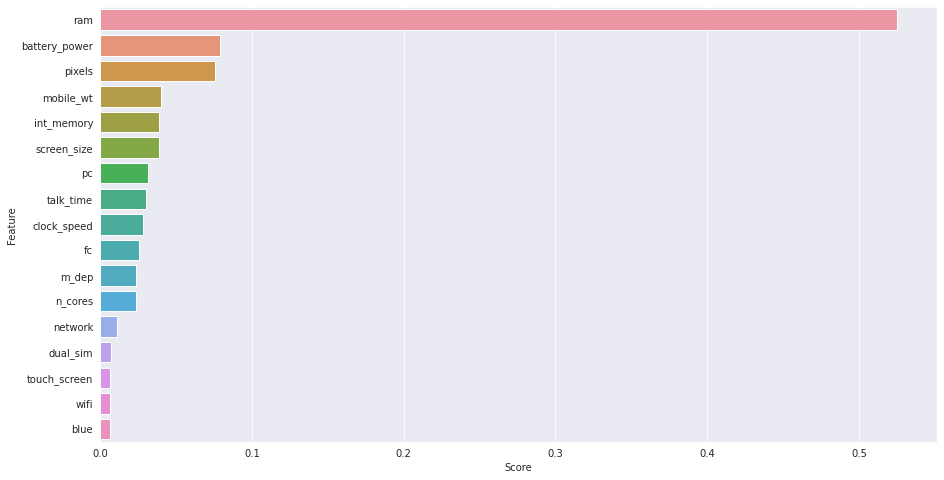

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x=feature_importance['Score'], y=feature_importance['Feature'])
plt.show()

RAM is certainly the most important feature for prediction of Price Range.

Now let's try to detect the best set of features for predictions.

In [ ]:
# here I'll run the RF classifier on most important feature
# and will keep adding the next most important fature
# we'll keep record of the accuracy
# this way we'll be able to Identify which feature works best for us
features = []
accuracy = []
report = []

for i in range(feature_importance.shape[0]):
    
    X1 = X[list(feature_importance.Feature[:i+1])]
    
    X_train, X_test, y_train, y_test = train_test_split(X1,y,.20, 42)
    
    clsr = RandomForestClassifier(n_estimators=300, random_state=42)
    
    clsr.fit(X_train, y_train)
    
    y_pred = clsr.predict(X_test)
    
    features.append(list(feature_importance.Feature[:i+1]))
    accuracy.append(accuracy_score(y_test, y_pred))
    report.append(classification_report(y_test, y_pred))

In [ ]:
ftrs_report = pd.DataFrame({'Feature List':features, 'Accuracy':accuracy, 'Report':report}).sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

In [ ]:
ftrs_report.head()

,Feature List,Accuracy,Report
0,"[ram, battery_power, pixels, mobile_wt]",0.9225,precision recall f1-score ...
1,"[ram, battery_power, pixels]",0.9200,precision recall f1-score ...
2,"[ram, battery_power, pixels, mobile_wt, int_me...",0.9200,precision recall f1-score ...
3,"[ram, battery_power, pixels, mobile_wt, int_me...",0.9150,precision recall f1-score ...
4,"[ram, battery_power, pixels, mobile_wt, int_me...",0.9125,precision recall f1-score ...


Let's check out the top features set which gave 92.5% accuracy.

In [ ]:
ftrs_report['Feature List'][0]

['ram', 'battery_power', 'pixels', 'mobile_wt']

In [ ]:
print(ftrs_report['Report'][0])

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       100
           1       0.89      0.90      0.90       100
           2       0.90      0.92      0.91       100
           3       0.96      0.94      0.95       100

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



So, now we have our best features set. We'll use them only. Let's try to get more accuracy by applying Hyper-parameter tuning.

In [ ]:
X = X[['ram', 'battery_power', 'pixels', 'screen_size', 'mobile_wt']]

### Hyperparameter tuning for Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_estimators':[700],
          'max_depth':[None,10,20,30,40],
          'max_features':['sqrt',4,'log2','auto'],
          'min_samples_split':[2,4,6],
          'max_leaf_nodes':[None, 20, 40]
          }

In [ ]:
rf = RandomForestClassifier()
clsr = GridSearchCV(rf, params, scoring='accuracy', cv=5)
clsr.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30, 40],
                         'max_features': ['sqrt', 4, 'log2', 'auto'],
                         'max_leaf_nodes': [None, 20, 40],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [700]},
             scoring='accuracy')

In [ ]:
clsr.best_params_

{'max_depth': 40,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_samples_split': 4,
 'n_estimators': 700}

In [ ]:
clsr.best_estimator_

RandomForestClassifier(max_depth=40, max_features='sqrt', min_samples_split=4,
                       n_estimators=700)

In [ ]:
clsr.best_score_

0.9120000000000001

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
clsr = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, 
                       min_samples_leaf=1,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
clsr.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, n_estimators=700)

In [ ]:
y_pred = clsr.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.925

In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'int_memory',
       'm_dep', 'mobile_wt', 'n_cores', 'pc', 'ram', 'talk_time',
       'touch_screen', 'wifi', 'price_range', 'screen_size', 'network',
       'pixels'],
      dtype='object')